In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchdiffeq import odeint, odeint_adjoint

In [2]:
def plot_data(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Time'], data['Glucose'], label='Glucose', color='blue', marker='o')
    plt.plot(data['Time'], data['Biomass'], label='Biomass', color='green', marker='o')
    plt.plot(data['Time'], data['Protein'], label='Protein', color='red', marker='o')
    plt.legend()
    plt.show()

Iter 0, Loss 162.22010803222656
Iter 1, Loss 57.36419677734375
Iter 2, Loss 41.2601432800293
Iter 3, Loss 25.96074676513672
Iter 4, Loss 11.936042785644531
Iter 5, Loss 7.569210052490234
Iter 6, Loss 6.621074676513672
Iter 7, Loss 6.214188098907471
Iter 8, Loss 5.936059474945068
Iter 9, Loss 5.706697463989258
Iter 10, Loss 5.506571292877197
Iter 11, Loss 5.326680660247803
Iter 12, Loss 5.167690277099609
Iter 13, Loss 5.024351596832275
Iter 14, Loss 4.902407646179199
Iter 15, Loss 4.795902252197266
Iter 16, Loss 4.718997001647949
Iter 17, Loss 4.657394886016846
Iter 18, Loss 4.643866062164307
Iter 19, Loss 4.624454498291016
Iter 20, Loss 4.672079086303711
Iter 21, Loss 4.631195068359375
Iter 22, Loss 4.665770053863525
Iter 23, Loss 4.527570724487305
Iter 24, Loss 4.485029697418213
Iter 25, Loss 4.300227165222168
Iter 26, Loss 4.215750217437744
Iter 27, Loss 4.06119966506958
Iter 28, Loss 3.9806058406829834
Iter 29, Loss 3.8705828189849854
Iter 30, Loss 3.8066608905792236
Iter 31, Loss 3

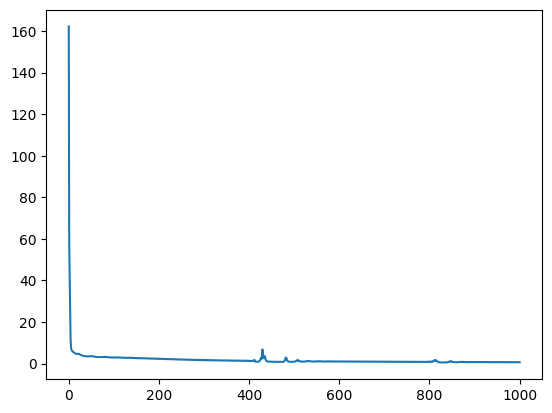

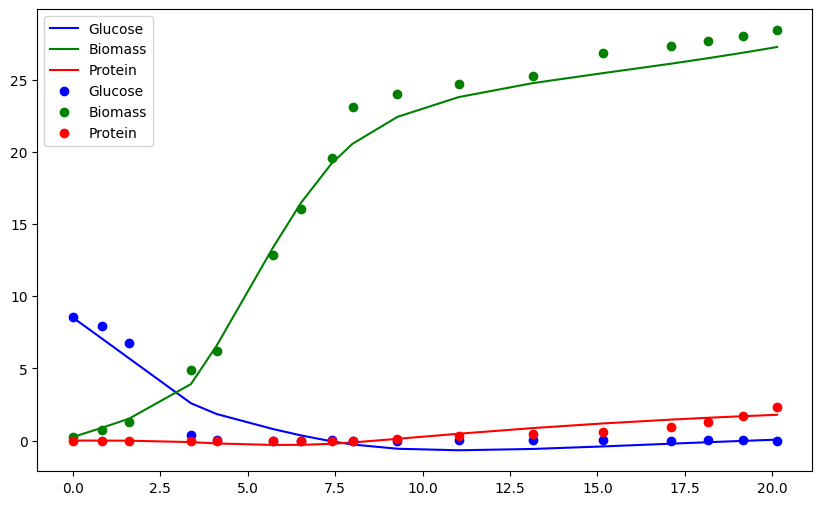

In [9]:
#  Read BR data
data = pd.read_excel('../Bioindustry/data/BR02_for_model.xlsx', header=0).drop(0, axis=0)
t_start = data['Time'].iloc[0]
t_end = data['Time'].iloc[-1]
t_span = [t_start, t_end]

# plot_data(data)
t = torch.tensor(data['Time'].values.astype(np.float32))
y_0 = torch.tensor([data['Glucose'].iloc[0], data['Biomass'].iloc[0], data['Protein'].iloc[0]])
y_true = torch.tensor(data[['Glucose', 'Biomass', 'Protein']].values.astype(np.float32))

# NODE
class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 3)
        )

    def forward(self, t, y):
        return self.net(y)
    
n_iters = 1000
func = ODEFunc()
optimizer = optim.RMSprop(func.parameters(), lr=0.0005)
criterion = nn.MSELoss()

LOSS = []
for iter in range(n_iters+1):
    optimizer.zero_grad()
    y_pred = odeint(func, y0=y_0, t=t, method='dopri5')
    loss = criterion(y_pred, y_true)
    LOSS.append(loss.item())
    loss.backward()
    optimizer.step()
    
    if iter % 1 == 0:
        print(f'Iter {iter}, Loss {loss.item()}')
        
plt.plot(LOSS)
plt.show()

# Plot
y_pred = odeint(func, y0=y_0, t=t, method='dopri5')
plt.figure(figsize=(10, 6))
plt.plot(t.detach().numpy(), y_pred[:, 0].detach().numpy(), label='Glucose', color='blue')
plt.plot(t.detach().numpy(), y_pred[:, 1].detach().numpy(), label='Biomass', color='green')
plt.plot(t.detach().numpy(), y_pred[:, 2].detach().numpy(), label='Protein', color='red')
plt.plot(data['Time'], data['Glucose'], label='Glucose', color='blue', marker='o', linestyle='None')
plt.plot(data['Time'], data['Biomass'], label='Biomass', color='green', marker='o', linestyle='None')
plt.plot(data['Time'], data['Protein'], label='Protein', color='red', marker='o', linestyle='None')
plt.legend()
plt.show()
